## 1. Load the dataset and perform following pre-processing tasks: [4 pts]
	1.1 Remove the first column of ‘Unnamed: 0’
	1.2 Detect missing values, and replace them with the mean.
    1.3 Draw box-plots for each attribute to detect if there are any outliers. 
        If there are outliers, ignore them for now.
    1.4 Normalize all attributes within the range of 0 to 1.


In [ ]:
# Importing libraries
import numpy as np     # used for handling number
import pandas as pd    # used for handling dataset
 
import warnings as wg         # To ignore the warnings
wg.filterwarnings('ignore')

In [ ]:
pip install -U scikit-learn

     |████████████████████████████████| 22.2MB 5.0MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [ ]:
from sklearn.impute import SimpleImputer   # used for handling missing data
from sklearn.model_selection import train_test_split  # used for spliting training and testing data
from sklearn.preprocessing import StandardScaler # used for feature scalling

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving popularity.csv to popularity.csv


In [ ]:
import io
dataset = pd.read_csv(io.BytesIO(uploaded['popularity.csv']))
dataset

,Unnamed: 0,avg_shares,avg_comments,avg_expert,popularity_score
0,19,147.3,23.9,19.1,14.6
1,91,28.6,1.5,33.0,7.3
2,166,17.9,37.6,21.6,8.0
3,196,94.2,4.9,8.1,9.7
4,42,293.6,27.7,1.8,20.7
...,...,...,...,...,...
195,155,4.1,11.6,5.7,3.2
196,80,76.4,26.7,22.3,11.8
197,181,218.5,5.4,27.4,12.2
198,145,140.3,1.9,9.0,10.3


## 1.1 Remove the first column of ‘Unnamed: 0’

In [ ]:
 
del dataset['Unnamed: 0']
dataset

,avg_shares,avg_comments,avg_expert,popularity_score
0,147.3,23.9,19.1,14.6
1,28.6,1.5,33.0,7.3
2,17.9,37.6,21.6,8.0
3,94.2,4.9,8.1,9.7
4,293.6,27.7,1.8,20.7
...,...,...,...,...
195,4.1,11.6,5.7,3.2
196,76.4,26.7,22.3,11.8
197,218.5,5.4,27.4,12.2
198,140.3,1.9,9.0,10.3


## 1.2 Detect missing values, and replace them with the mean.

In [ ]:
# checking for missing values
 
dataset.isnull()

,avg_shares,avg_comments,avg_expert,popularity_score
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
195,False,False,False,False
196,False,False,False,False
197,False,False,False,False
198,False,False,False,False


In [ ]:
dataset[7:22]  # observe Nan in 7th entry and 19th entry

,avg_shares,avg_comments,avg_expert,popularity_score
7,168.4,NaN,12.8,11.7
8,280.2,10.1,21.4,14.8
9,19.4,16.0,22.3,6.6
10,107.4,14.0,10.9,11.5
11,177.0,9.3,6.4,12.8
12,296.4,36.3,100.9,23.8
13,237.4,27.5,11.0,18.9
14,232.1,8.6,8.7,13.4
15,206.9,8.4,26.4,12.9
16,131.1,42.8,28.9,18.0


In [ ]:
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
X = dataset.iloc[:, 0:4].values   
imputer = imputer.fit(X[:, 0:4])
X[:, 0:4] = imputer.transform(X[:, 0:4])

In [ ]:
dataset[7:20]          # notice now NaN vales of 7th and 19th row are filled with mean

,avg_shares,avg_comments,avg_expert,popularity_score
7,168.400000,23.319388,12.8,11.7
8,280.200000,10.100000,21.4,14.8
9,19.400000,16.000000,22.3,6.6
10,107.400000,14.000000,10.9,11.5
11,177.000000,9.300000,6.4,12.8
12,296.400000,36.300000,100.9,23.8
13,237.400000,27.500000,11.0,18.9
14,232.100000,8.600000,8.7,13.4
15,206.900000,8.400000,26.4,12.9
16,131.100000,42.800000,28.9,18.0


##     1.3 Draw box-plots for each attribute to detect if there are any outliers. If there are outliers, ignore them for now.


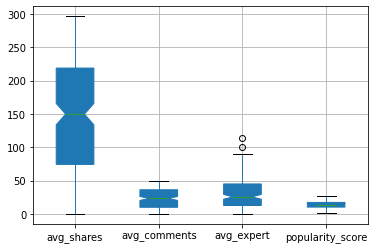

In [ ]:
# Boxplot with outliers
 
boxplot = dataset.boxplot(column = ['avg_shares','avg_comments','avg_expert','popularity_score'],patch_artist = True,
                          notch ='True')

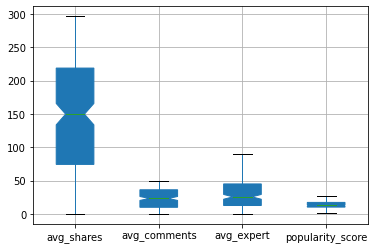

In [ ]:
# Boxplot without outliers
 
boxplot = dataset.boxplot(column = ['avg_shares','avg_comments','avg_expert','popularity_score'],patch_artist = True,
                          notch ='True',showfliers=False)

## 1.4 Normalize all attributes within the range of 0 to 1.

###        The min max feature scaling 

In [ ]:
from sklearn import preprocessing 
 
# Normalization refers to rescaling real valued numeric attributes into the range 0 and 1.
normalized_X = preprocessing.normalize(dataset)
normalized_X

array([[0.97452547, 0.15812056, 0.12636413, 0.09659248],
       [0.64559655, 0.03385996, 0.7449191 , 0.16478513],
       [0.37613592, 0.79009557, 0.45388469, 0.16810544],
       [0.98980656, 0.05148675, 0.08511076, 0.10192276],
       [0.99311693, 0.09369666, 0.00608859, 0.0700188 ],
       [0.87182477, 0.29334786, 0.37300697, 0.12138532],
       [0.99295394, 0.01292132, 0.10535848, 0.05267924],
       [0.98543442, 0.13645919, 0.07490238, 0.06846546],
       [0.99507553, 0.03586818, 0.07599792, 0.05255931],
       [0.56638775, 0.46712392, 0.65105396, 0.19268862],
       [0.98116689, 0.12789885, 0.09957839, 0.10505977],
       [0.99538328, 0.0522998 , 0.03599126, 0.07198252],
       [0.9376841 , 0.11483783, 0.31920488, 0.07529312],
       [0.98922489, 0.11459008, 0.04583603, 0.07875464],
       [0.99695836, 0.03694029, 0.03736983, 0.05755813],
       [0.98926685, 0.04016356, 0.12622835, 0.06167976],
       [0.92291315, 0.30130193, 0.2034492 , 0.12671576],
       [0.98066522, 0.14727939,

## 2. Visualize through scatter plots the relationship of each attribute with the target attribute.

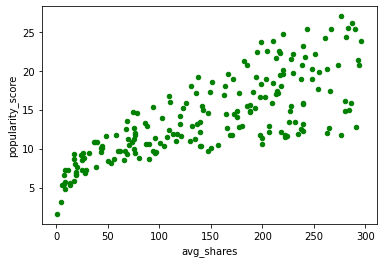

In [ ]:
ax = dataset.plot.scatter(x = 'avg_shares', y = 'popularity_score', c= 'green')

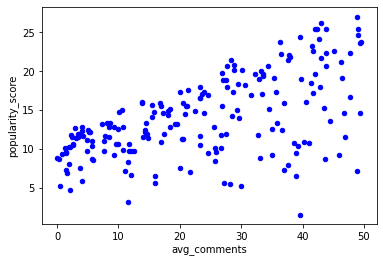

In [ ]:
ax = dataset.plot.scatter(x = 'avg_comments', y = 'popularity_score', c= 'blue')

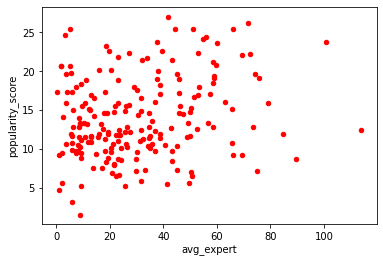

In [ ]:
ax = dataset.plot.scatter(x = 'avg_expert', y = 'popularity_score', c= 'red')

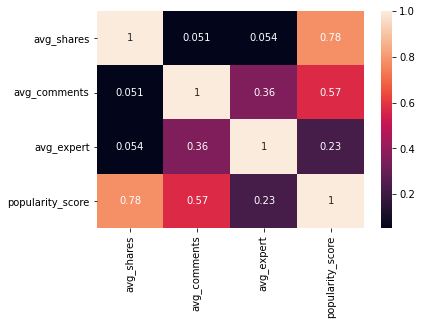

In [ ]:
import seaborn as sn
corrMatrix = dataset.corr()
sn.heatmap(corrMatrix, annot=True)


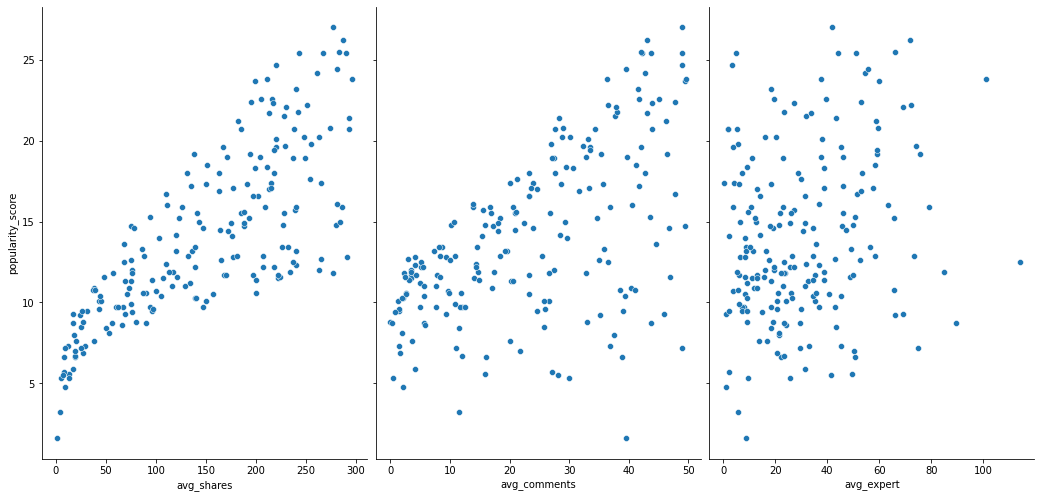

In [ ]:
sn.pairplot(dataset, x_vars=['avg_shares','avg_comments','avg_expert'],y_vars='popularity_score', size=7, aspect=0.7)

In [ ]:
features_col =['avg_shares','avg_comments','avg_expert']

X = dataset[features_col]
y = dataset.popularity_score



## 3. Split the dataset into train and test, into 70% and 30% respectively. [1 pt]

In [ ]:
X_train, X_test,y_train,y_test  = train_test_split(X,y, test_size=0.3,random_state=42)

In [ ]:
X_train

,avg_shares,avg_comments,avg_expert
169,184.9,43.9,1.7
97,142.9,29.3,12.6
31,248.4,30.2,20.3
12,296.4,36.3,100.9
35,117.2,14.7,5.4
...,...,...,...
106,8.6,2.1,1.0
14,232.1,8.6,8.7
92,199.1,30.6,38.7
179,76.4,0.8,14.8


In [ ]:
X_test

,avg_shares,avg_comments,avg_expert
95,44.500000,39.300000,45.1
15,206.900000,8.400000,26.4
30,95.700000,1.400000,7.4
158,281.400000,39.600000,55.8
128,31.500000,24.600000,2.2
115,239.800000,4.100000,36.9
69,48.300000,47.000000,8.5
170,7.300000,28.100000,41.4
174,23.800000,35.100000,65.9
45,70.600000,23.319388,40.8


## 4. Train the linear regression model and print the coefficients (parameters) learned by the final model. [1 pt]

In [ ]:
from sklearn.linear_model import LinearRegression
 
linreg = LinearRegression()
 
linreg.fit(X_train,y_train)

LinearRegression()

In [ ]:
print(linreg.intercept_)
print(linreg.coef_)

3.010123993831364
[ 0.04598291  0.17741631 -0.00018107]


In [ ]:
y_pred = linreg.predict(X_test)

In [ ]:
y_pred

array([12.02065792, 14.00950403,  7.65773104, 22.96529586,  8.82262833,
       14.75755029, 13.56812569,  8.32370113, 10.31989701, 10.38636917,
        8.15548783, 13.73326944, 20.44836311, 16.50161305,  9.82586181,
       10.05553452,  9.32935248, 17.93081945,  9.70606396, 20.17702715,
       24.41087941, 16.62666801,  9.96591752, 19.03271366, 22.87854443,
        8.88474792, 16.13736031, 18.45412084, 10.05328426, 21.49634311,
        6.73681542, 17.29323516, 21.83297786, 11.28164854,  8.39684311,
       12.32426777, 20.45025551, 15.3874777 , 18.22390243, 20.19654409,
        9.7924972 , 14.01047575, 15.34418352, 15.20113774, 20.76286884,
        5.25565097,  5.42061258, 11.1300735 ,  7.07422678, 15.23412227,
       13.43844105, 10.05239729, 17.57260027, 16.30097962, 16.6169618 ,
        9.63917058, 10.06830309, 14.69863141,  9.57875937, 19.59260724])

In [ ]:
y_pred.shape

(60,)

## coefficients (parameters) learned by the final model.

In [ ]:
list(zip(features_col,linreg.coef_))

[('avg_shares', 0.04598290628161205),
 ('avg_comments', 0.17741630678576242),
 ('avg_expert', -0.00018107012183354865)]

## 5. Print the confidence interval and p-value of each of the coefficients, and explain your interpretations. [1 pt]

In [ ]:
target_col = "popularity_score"

X = dataset.loc[:, dataset.columns != target_col]
Y = dataset.loc[:, target_col]
print(X)
print(Y)



     avg_shares  avg_comments  avg_expert
0         147.3          23.9        19.1
1          28.6           1.5        33.0
2          17.9          37.6        21.6
3          94.2           4.9         8.1
4         293.6          27.7         1.8
..          ...           ...         ...
195         4.1          11.6         5.7
196        76.4          26.7        22.3
197       218.5           5.4        27.4
198       140.3           1.9         9.0
199       266.9          43.8         5.0

[200 rows x 3 columns]
0      14.6
1       7.3
2       8.0
3       9.7
4      20.7
       ... 
195     3.2
196    11.8
197    12.2
198    10.3
199    25.4
Name: popularity_score, Length: 200, dtype: float64


In [ ]:
X_train, X_test,y_train,y_test  = train_test_split(X,y, test_size=0.3,random_state=42)

## Linear Regression using Statsmodels

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as snf

We need to add a constant term to allow statsmodels.api to calculate the bias/ intercepts

In [ ]:
X_with_constant = sm.add_constant(X_train)

In [ ]:
pd.DataFrame(X_with_constant)

,const,avg_shares,avg_comments,avg_expert
169,1.0,184.9,43.9,1.7
97,1.0,142.9,29.3,12.6
31,1.0,248.4,30.2,20.3
12,1.0,296.4,36.3,100.9
35,1.0,117.2,14.7,5.4
...,...,...,...,...
106,1.0,8.6,2.1,1.0
14,1.0,232.1,8.6,8.7
92,1.0,199.1,30.6,38.7
179,1.0,76.4,0.8,14.8


In [ ]:
model = sm.OLS(y_train, X_with_constant)

In [ ]:
results = model.fit()

In [ ]:
results.params

const           3.010124
avg_shares      0.045983
avg_comments    0.177416
avg_expert     -0.000181
dtype: float64

In [ ]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       popularity_score   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     333.6
Date:                Wed, 10 Feb 2021   Prob (F-statistic):           1.73e-62
Time:                        04:01:20   Log-Likelihood:                -278.48
No. Observations:                 140   AIC:                             565.0
Df Residuals:                     136   BIC:                             576.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            3.0101      0.401      7.513      0.000       2.218       3.802
avg_shares       0.0460      0.002     26.758      0.000       0.043       0.049
avg_comments     0.1774      0.011     15.702      0.000       0.155       0.200
avg_expert      -0.0002      0.007     -0.027      0.979      -0.014       0.013
==============================================================================
Omnibus:                       40.591   Durbin-Watson:                   2.206
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               84.652
Skew:                          -1.249   Prob(JB):                     4.15e-19
Kurtosis:                       5.876   Cond. No.                         463.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## p-values of each Coefficient 


In [ ]:
results.pvalues

const           6.950311e-12
avg_shares      4.822653e-56
avg_comments    2.436480e-32
avg_expert      9.788021e-01
dtype: float64

### Interpretation 

NOTE: If p-value(Xi) < 0.05, then Y depends on Xi.
1. As p-value(avg_shares) = 4.822653e-56 < 0.05, hence "popularity_score" depends on "avg_shares".

2. As p-value(avg_comments) = 2.436480e-32 < 0.05, hence "popularity_score" depends on "avg_comments".

3. As p-value(avg_expert) = 9.788021e-01 > 0.05, hence "avg_expert" does not play significant role in pridicting the "popularity_score".

## Confidence interval of each Coefficient 


In [ ]:
results.conf_int(alpha=0.05, cols=None)

,0,1
const,2.217767,3.802481
avg_shares,0.042584,0.049381
avg_comments,0.155071,0.199761
avg_expert,-0.013633,0.013271


## 6. Evaluate the linear regression model and print the values of RMSE, MAE, and MSE. [1 pt]


In [ ]:
from sklearn import metrics
import math

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test,y_pred))
print('Mean Square Error: ', metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Absolute Error: ', math.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error:  1.3307168895533528
Mean Square Error:  2.4478381701813543
Root Mean Absolute Error:  1.5645568606418094


## 7. Plot residual curve and Q-Q plot. [1 pt] 


In [ ]:
X_test = sm.add_constant(X_test)

In [ ]:
y_pred = results.predict(X_test)

In [ ]:
residual = y_test - y_pred

## Residual Plot

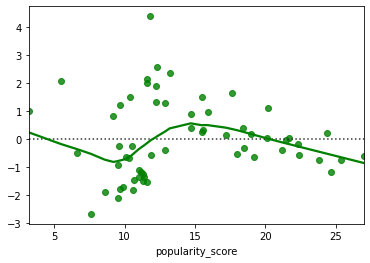

In [ ]:
sn.residplot(x=y_test, y=y_pred, lowess=True, color="g")

## Q-Q plot

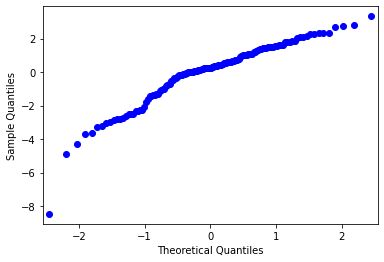

In [ ]:
import matplotlib.pyplot as plt

res = results.resid
fig = sm.qqplot(res)
plt.show()